In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from tabulate import tabulate
import random
import tensorflow as tf
import os
for dirname, _, filenames in os.walk('/content/onlinefraud.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/onlinefraud.csv')

In [ ]:
df.drop('isFlaggedFraud', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763196 entries, 0 to 2763195
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
dtypes: float64(6), int64(1), object(3)
memory usage: 210.8+ MB


In [ ]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
932379,43,TRANSFER,924373.33,C2138765572,204791.00,0.00,C2054724135,0.00,924373.33,0.0
107623,10,CASH_IN,265146.14,C1132296640,5786625.64,6051771.78,C980726513,8965420.31,8700274.17,0.0
1690293,159,CASH_OUT,206236.42,C625148780,60851.00,0.00,C1261559853,36593.60,242830.02,0.0
2750681,212,CASH_IN,113881.39,C2001995044,3436180.24,3550061.63,C355105316,1669245.06,1555363.67,0.0
1099380,130,CASH_IN,135481.83,C1709374446,15912257.07,16047738.90,C504279883,272900.13,137418.30,0.0


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
#deal with missing values

df.dropna(inplace=True)
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
fraud_min_max = [
    ['amount', df.amount.min(), df.amount.max()],
    ['oldbalanceOrg', df.oldbalanceOrg.min(), df.oldbalanceOrg.max()],
    ['newbalanceOrig', df.newbalanceOrig.min(), df.newbalanceOrig.max()],
    ['oldbalanceDest', df.oldbalanceDest.min(), df.oldbalanceDest.max()],
    ['isFraud', df.isFraud.min(), df.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 |       1e+07 |
|  1 | oldbalanceOrg  |           0 | 3.89394e+07 |
|  2 | newbalanceOrig |           0 | 3.89462e+07 |
|  3 | oldbalanceDest |           0 | 4.22838e+07 |
|  4 | isFraud        |           0 |           1 |


In [ ]:
# Downcast numerical columns with smaller dtype
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = pd.to_numeric(df[col], downcast='float')
    if df[col].dtype == 'int64':
        df[col] = pd.to_numeric(df[col], downcast='unsigned')

# Use category dtype for categorical column
df['type'] = df['type'].astype('category')

In [ ]:
# Check duplicate values
df.duplicated().sum()

0

**Univariate Data Visualization**

In [ ]:
df['step'].value_counts()

,count
step,
19,51352
18,49579
187,49083
163,46352
139,46054
...,...
28,4
76,4
124,4


<ipython-input-12-c316b7b7b898>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='type', data=df, palette='PuBu')


Text(0, 0.5, 'Number of transactions')

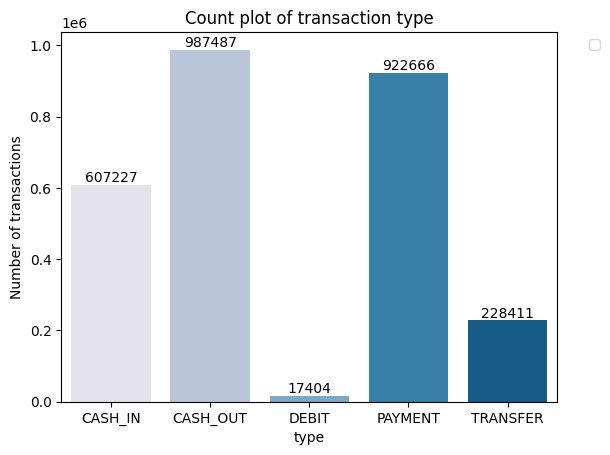

In [ ]:
ax = sns.countplot(x='type', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

Text(0.5, 1.0, 'Distribution of transaction amount')

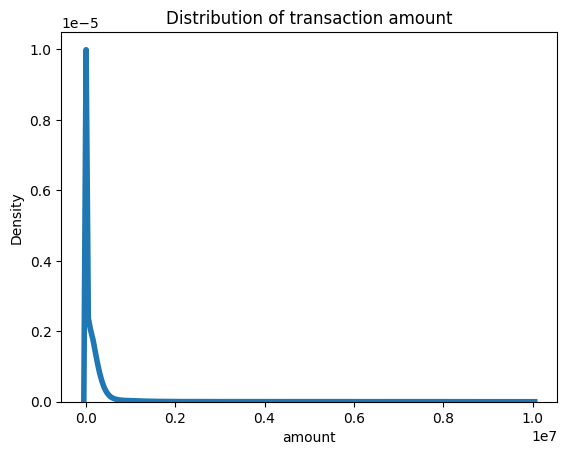

In [ ]:
sns.kdeplot(df['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

### The distribution of transaction amounts is right skewed. This indicates that most values are clustered around the left tail of the distribution, with the longer right tail. (mode < median < mean)

In [ ]:
df['nameOrig'].value_counts()

,count
nameOrig,
C1677795071,3
C1999539787,3
C400299098,3
C1018359939,2
C102946146,2
...,...
C1989431450,1
C345281345,1
C316745487,1


Text(0.5, 1.0, 'Distribution of transaction amount')

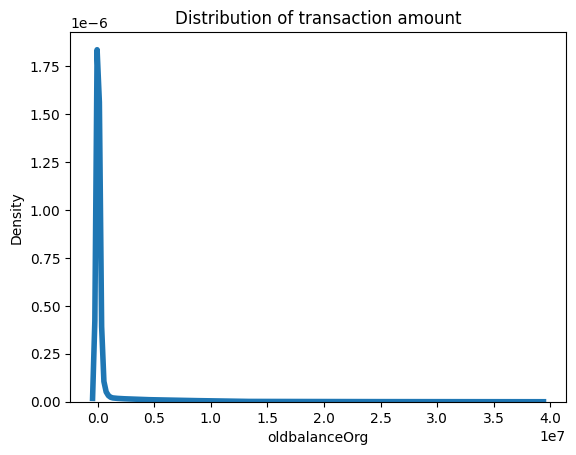

In [ ]:
sns.kdeplot(df['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of pre-transaction balances of the initial customers is right skewed.

Text(0.5, 1.0, 'Distribution of transaction amount')

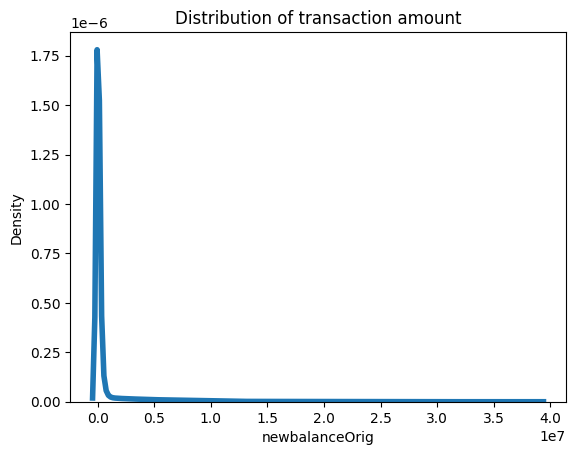

In [ ]:
sns.kdeplot(df['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of post-transaction balances of the initial customers is right skewed.

In [ ]:
df['nameDest'].value_counts()

,count
nameDest,
C1286084959,102
C985934102,102
C665576141,99
C248609774,94
C1590550415,94
...,...
M1193514189,1
M1215110266,1
M1391081984,1


Text(0.5, 1.0, 'Distribution of transaction amount')

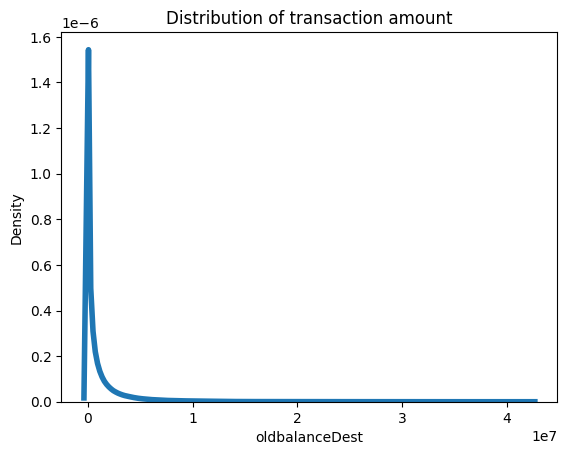

In [ ]:
sns.kdeplot(df['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of pre-transaction balances of the recipient is right skewed

Text(0.5, 1.0, 'Distribution of transaction amount')

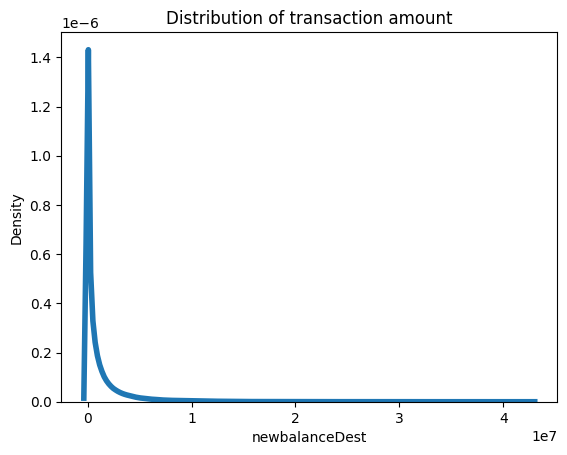

In [ ]:
sns.kdeplot(df['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

The distribution of post-transaction balances of the recipient is right skewed

<ipython-input-20-d174391ea540>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='isFraud', data=df, palette='PuBu')


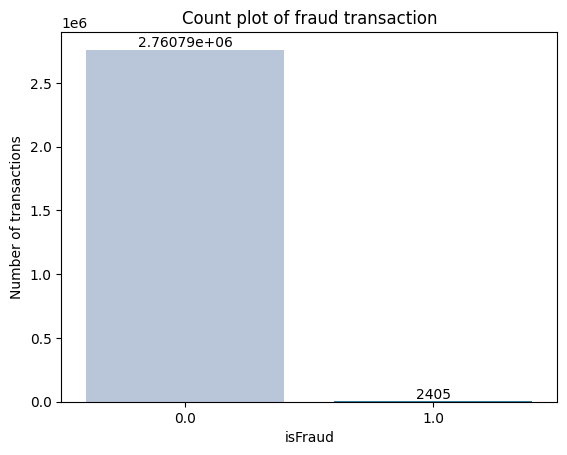

In [ ]:
ax = sns.countplot(x='isFraud', data=df, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

There are much more non-fraudulent transactions than fraudulent transactions

**Bivariate data visualization**

<ipython-input-21-6c0ccffb48ce>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby(['type', 'isFraud']).size().unstack()


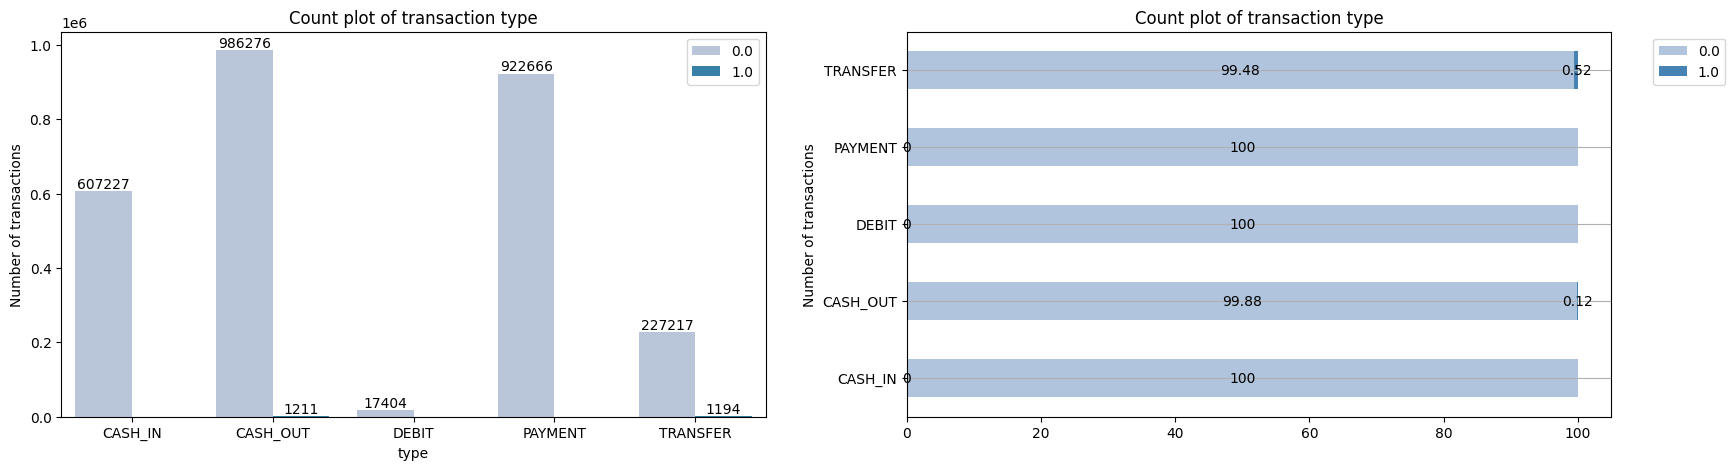

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round(x/sum(x)*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')

Fraudulent transactions only occur in debit and transfer types

Text(0, 0.5, 'Number of transactions')

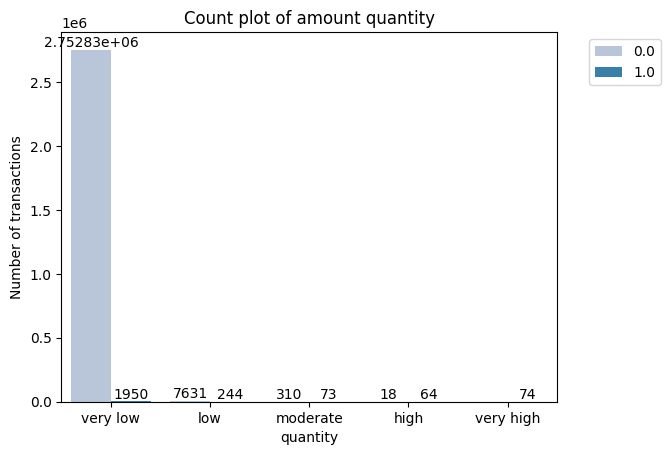

In [ ]:
df['quantity'] = pd.cut(df['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')


All fraudulent transactions fall into the category of very low amounts. This suggests that in most cases, small transactions are more prone to fraudulent transactions.

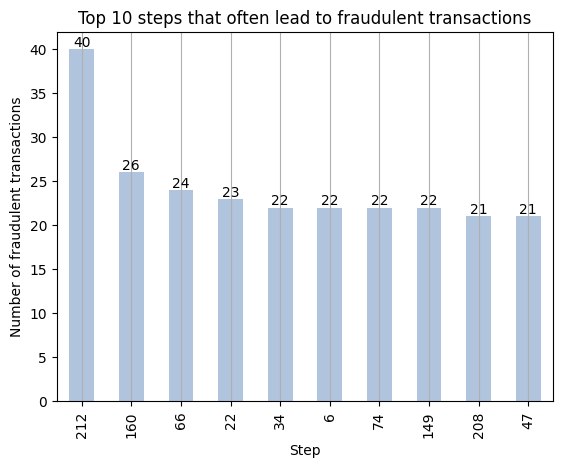

In [ ]:
df1 = df[df['isFraud']==1]
df2 = df1['step'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 steps that often lead to fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Step')
plt.grid(axis='x')

del ax, df2

Step 212 has the highest number of fraudulent transactions, 40 cases. This indicates that Step 6 is the step that will most likely lead to fraudulent transactions.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

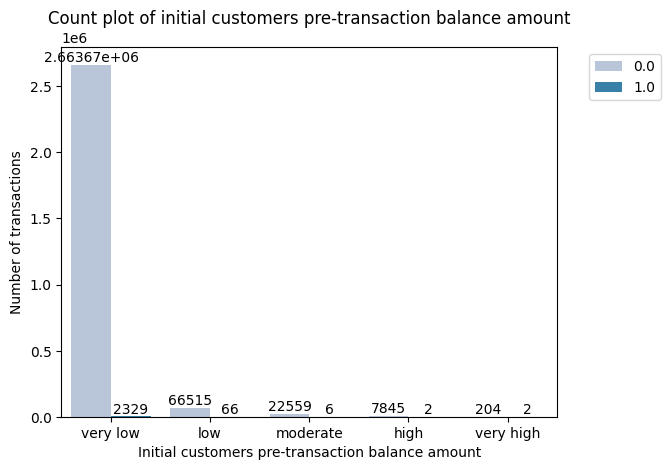

In [ ]:
df['oldbalanceOrg_amt'] = pd.cut(df['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

Initial customers with very low pre-transaction balances has the highest number of fraudulent transactions. This means that initial customers with very low pre-transaction balances may be more likely to fall for a fraudulent transaction.

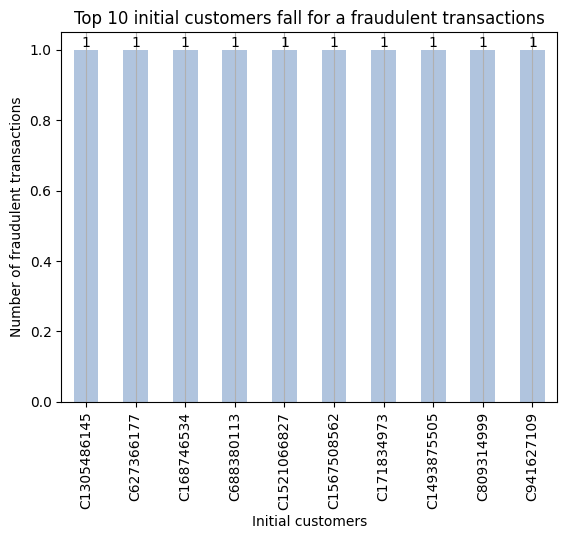

In [ ]:
df2 = df1['nameOrig'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 initial customers fall for a fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Initial customers')
plt.grid(axis='x')

del ax, df2

Initial customers are scammed of at most one for a fraudulent transaction

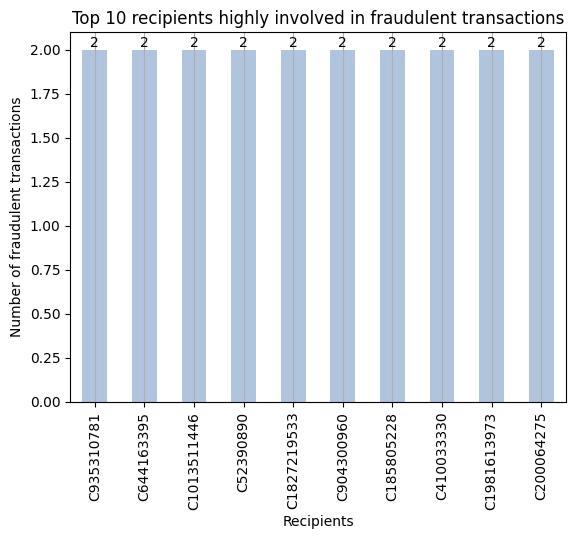

In [ ]:
df2 = df1['nameDest'].value_counts().head(10)
ax = df2.plot(kind='bar', color='lightsteelblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 recipients highly involved in fraudulent transactions')
plt.ylabel('Number of fraudulent transactions')
plt.xlabel('Recipients')
plt.grid(axis='x')

del ax, df2

Suspicious recipients only have a maximum of 2 involved fraudulent transactions.

In [ ]:
# Check the data type of 'oldbalanceDest'
print(df['oldbalanceDest'].dtype)

# If it's not numeric, convert it to a suitable numeric type (e.g., float)
if df['oldbalanceDest'].dtype == object:
    df['oldbalanceDest'] = pd.to_numeric(df['oldbalanceDest'], errors='coerce')  # 'coerce' handles non-numeric values as NaN

# Handle missing values (NaN) if necessary
df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean(), inplace=True)  # Replace NaN with the mean value, adjust as needed

# Now apply pd.cut
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

float64


Text(0.5, 0, 'Recipient pre-transaction balance amount')

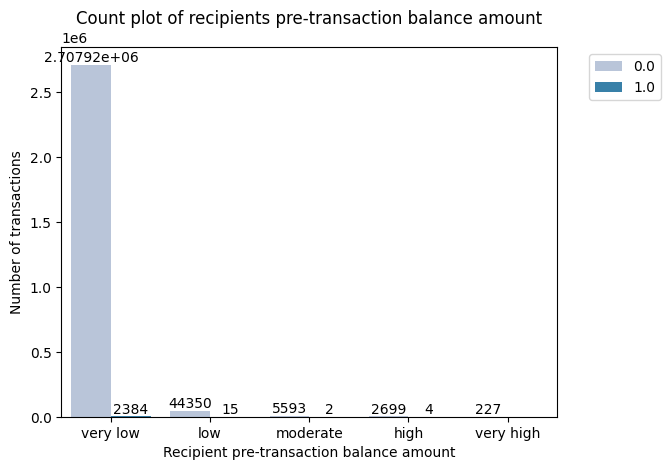

In [ ]:
df['oldbalanceDest_amt'] = pd.cut(df['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=df, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

Recipients with very low pre-transaction balances has the highest number of fraudulent transactions. This implies that recipients with very low pre-transaction balances may be more susceptible to fraudulent transactions.

**Multivariate data visualization**

Text(0.5, 1.0, 'Correlation')

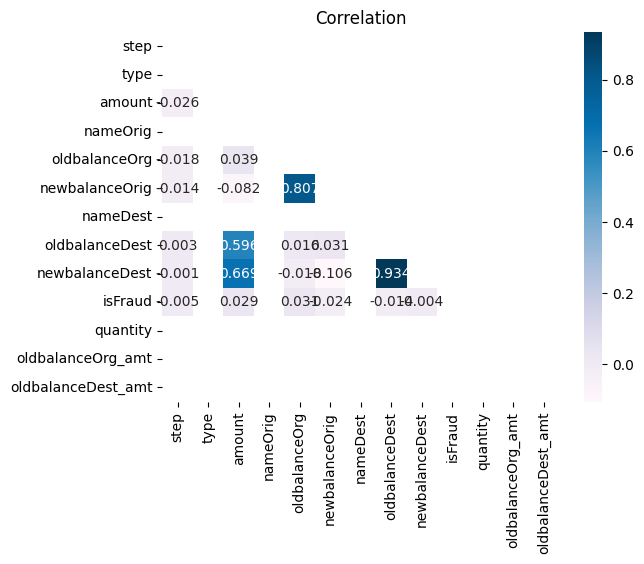

In [ ]:
# Check for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric if possible, or handle them appropriately
for col in non_numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, replacing non-convertible values with NaN
    except ValueError:
        # Handle non-numeric columns that cannot be converted
        print(f"Column '{col}' contains non-numeric values that cannot be converted.")
        # You might want to drop these columns or handle them differently based on your data

# Calculate the correlation matrix after handling non-numeric columns
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

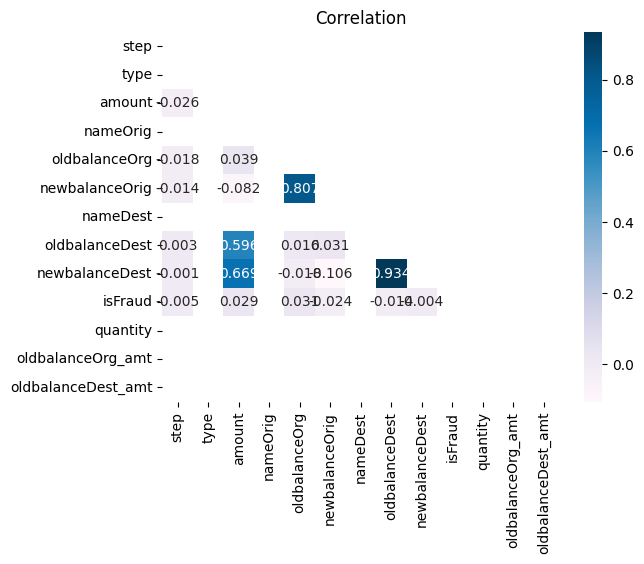

In [ ]:
corr_matrix = df.corr('spearman')
sns.heatmap(corr_matrix, cbar=True, annot=True, mask = np.triu(np.ones_like(corr_matrix, dtype = bool)), fmt='.3f', cmap='PuBu')
plt.title('Correlation')

oldbalanceOrg and newbalanceOrig has strong positive relationship. oldbalanceDest and newbalanceDest has strong positive relationship. oldbalanceOrg and amount has weak positive relationship. newbalanceOrig and amount has moderate positive relationship

**Model Building**

In [ ]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

Due to the large dataset, Random Forest and Logistic Regression with balanced class weight are used to identify online payment fraud

In [ ]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')

# Handle missing values in 'y' before splitting
y.fillna(y.mode()[0], inplace=True)  # Fill with the most frequent value

# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))

        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))

        print('\n')

In [ ]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [ ]:
# Data preprocessing
df['type'] = df['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs


seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


X = df.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')

# Handle missing values in 'y' before splitting
y.fillna(y.mode()[0], inplace=True)  # Fill with the most frequent value

# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace NaNs with the mean of each column
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert back to DataFrames after imputation



X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['type']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
model_comparison_evaluate(classifiers, X_train, y_train)

K-Fold Cross-Validation:

Random Forest Classifier:


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mean accuracy score: 0.960 (0.010)
Mean precision score: 0.954 (0.017)
Mean recall score: 0.967 (0.010)
Mean f1 score: 0.960 (0.009)
Mean roc_auc score: 0.992 (0.003)


Logistic Regression:
Mean accuracy score: 0.718 (0.018)
Mean precision score: 0.805 (0.022)
Mean recall score: 0.574 (0.026)
Mean f1 score: 0.670 (0.024)
Mean roc_auc score: 0.809 (0.012)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      0.96      0.98    552158
    Fraud [1]       0.02      0.96      0.04       481

     accuracy                           0.96    552639
    macro avg       0.51      0.96      0.51    552639
 weighted avg       1.00      0.96      0.98    552639
 



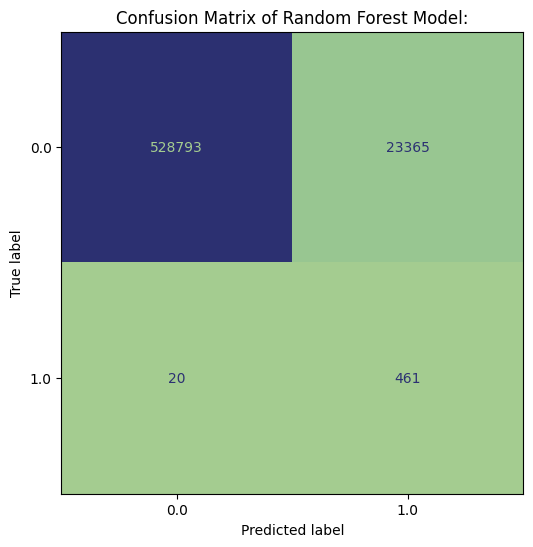

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Initialize and fit Random Forest classifier
model = RandomForestClassifier(class_weight='balanced', random_state=seed)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_score = model.predict_proba(X_test)[:, 1]

# Print classification report
print('Random Forest Classifier:')
print(classification_report(y_test, y_pred, labels=[0, 1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    colorbar=False,
    values_format='',
    cmap='crest',
    ax=ax
)
ax.grid(False)

plt.show()


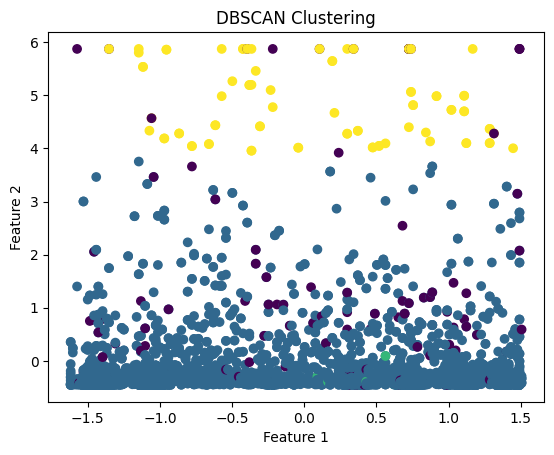

In [ ]:


import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming X_train and y_train are already defined and preprocessed

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
clusters = dbscan.fit_predict(X_scaled)

# Visualize the clusters (adjust the code based on the number of features you want to visualize)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


DBSCAN Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       0.51      1.00      0.68       153
    Fraud [1]       0.00      0.00      0.00       147

     accuracy                           0.51       300
    macro avg       0.26      0.50      0.34       300
 weighted avg       0.26      0.51      0.34       300
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


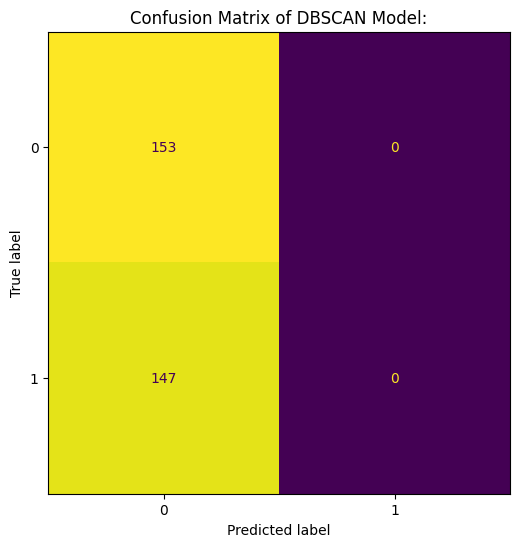

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_clusters_per_class=1, n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply DBSCAN to training data
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
y_pred_train = dbscan.fit_predict(X_train_scaled)

# Assign labels to clusters
unique_labels = set(y_pred_train)
cluster_mapping = {}
for label in unique_labels:
    if label == -1:  # Noise points
        cluster_mapping[label] = 0  # Or any label you want to assign to noise
    else:
        # Map cluster labels to majority class within the cluster
        cluster_indices = y_pred_train == label
        majority_class = y_train[cluster_indices].mode()[0]
        cluster_mapping[label] = majority_class

# Apply cluster mapping to training predictions
y_pred_train_mapped = [cluster_mapping[label] for label in y_pred_train]

# Predict on test data
y_pred_test = dbscan.fit_predict(X_test_scaled)

# Apply cluster mapping to test predictions
y_pred_test_mapped = [cluster_mapping.get(label, 0) for label in y_pred_test]  # Handle unseen labels as noise (0)

# Evaluate performance
print('DBSCAN Classifier:')
print(classification_report(y_test, y_pred_test_mapped, labels=[0, 1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Confusion Matrix of DBSCAN Model:')
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_test_mapped,
    colorbar=False,
    values_format='',
    cmap='viridis',  # Change to a supported colormap
    ax=ax
)
ax.grid(False)
plt.show()


In [ ]:
# True Positives (TP): 153
# False Negatives (FN): 147
# True Negatives (TN): 0
# False Positives (FP): 0